# Central Pivot Range (CPR)

https://www.tradingview.com/script/EGsBWBpe-SD-Developing-Central-Pivot-Range/

https://pivotboss.com/2010/05/31/a-quick-guide-to-the-pivot-range/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2023-01-01'
end = '2023-03-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02 00:00:00+05:30,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100
2023-01-03 00:00:00+05:30,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000
2023-01-04 00:00:00+05:30,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800
2023-01-05 00:00:00+05:30,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100
2023-01-06 00:00:00+05:30,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100


In [3]:
df['Pivot'] = (df['High'] + df['Low'] + df['Adj Close']) / 3.0
df['BC'] = (df['High'] + df['Low']) / 2.0
df['TC'] = (df['Pivot'] - df['BC']) + df['Pivot']

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC
Date,,,,,,,,,
2023-01-02 00:00:00+05:30,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,43182.533854,43172.250000,43192.817708
2023-01-03 00:00:00+05:30,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,43352.166667,43315.625000,43388.708333
2023-01-04 00:00:00+05:30,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,43131.949219,43218.523438,43045.375000
2023-01-05 00:00:00+05:30,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,42681.617188,42718.076172,42645.158203
2023-01-06 00:00:00+05:30,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,42250.566406,42281.449219,42219.683594


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC
Date,,,,,,,,,
2023-02-22 00:00:00+05:30,40494.148438,40529.250000,39899.000000,39995.898438,39995.898438,155200,40141.382812,40214.125000,40068.640625
2023-02-23 00:00:00+05:30,39983.699219,40147.800781,39600.250000,40001.550781,40001.550781,200500,39916.533854,39874.025391,39959.042318
2023-02-24 00:00:00+05:30,40259.101562,40348.101562,39818.898438,39909.398438,39909.398438,144600,40025.466146,40083.500000,39967.432292
2023-02-27 00:00:00+05:30,39820.398438,40371.449219,39745.398438,40307.101562,40307.101562,165200,40141.316406,40058.423828,40224.208984
2023-02-28 00:00:00+05:30,40302.699219,40391.449219,40073.000000,40269.050781,40269.050781,327800,40244.500000,40232.224609,40256.775391


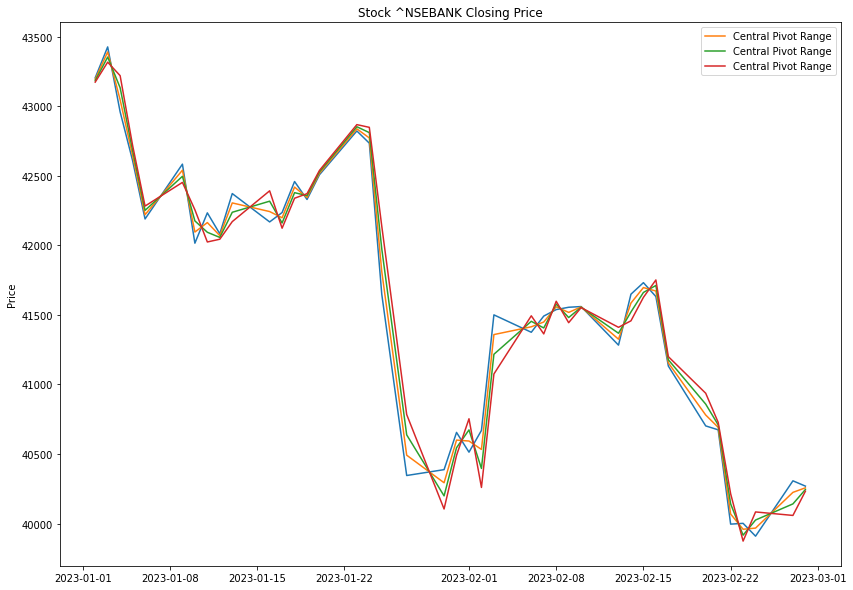

In [6]:
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(df['TC'], label='Central Pivot Range')
plt.plot(df['Pivot'], label='Central Pivot Range')
plt.plot(df['BC'], label='Central Pivot Range')
plt.title('Stock '+ symbol +' Closing Price')
plt.ylabel('Price')
plt.legend(loc='best')

## Candlestick with Central Pivot Range (CPR)

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pivot,BC,TC,VolumePositive
0,19358.770833,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,43182.533854,43172.250000,43192.817708,True
1,19359.770833,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,43352.166667,43315.625000,43388.708333,True
2,19360.770833,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,43131.949219,43218.523438,43045.375000,False
3,19361.770833,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,42681.617188,42718.076172,42645.158203,False
4,19362.770833,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,42250.566406,42281.449219,42219.683594,False


/Users/chrislernunes/opt/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


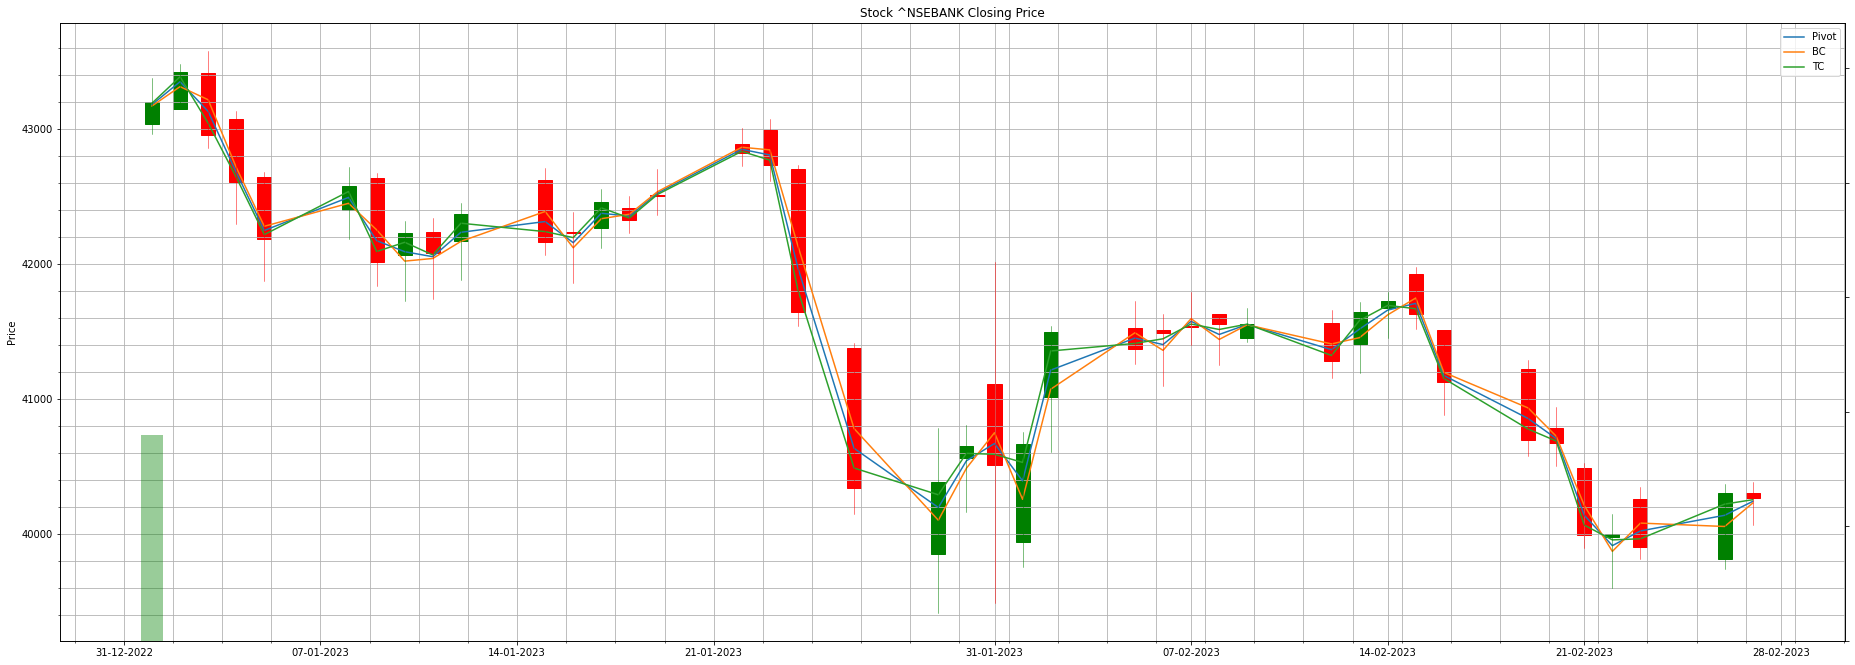

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(32,25))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Pivot'], label='Pivot')
ax1.plot(df['BC'], label='BC')
ax1.plot(df['TC'], label='TC')
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')